# Elliptic equations
### Carl Fredrik Berg, NTNU, 2023

## Introduction

Elliptic equations is as subclass of second-order partial differential equations. All second-order partial differential equations can be written on the form

$$A \frac{\partial^2 f}{\partial x^2} + B \frac{\partial^2 f}{\partial x \partial y} + C \frac{\partial^2 f}{\partial y^2} + D \frac{\partial f}{\partial x} +  E \frac{\partial f}{\partial y} + F f + G = 0$$

An <i>elliptic</i> second-order partial differential equation is an equation on the form above where $B^2-AC < 0$.

Elliptic equations commonly arise in physics problems. Two typical elliptic equations are the Laplace equation's $\nabla^2 f = 0$ and the Poisson equation's $\nabla^2 f = f$. We see that for the Laplace equation we have $A= 1 = C$, while all the other pre-factors are zero, thus $B^2 - AC = 0 - 1 = -1 < 0$, as required to be an elliptic equation. For the Poisson equation we also have $F = -1$, however, this is not affecting the equation $B^2 - AC = -1$.

In this section we will mostly investigate the Laplace equation's.

## Laplace equation

A <i>Laplace equation</i> is a PDE of the form

$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} = 0$$

Here $\Delta = \nabla^2 = \nabla \cdot \nabla$ is the Laplace operator, with $\nabla \cdot$ being the divergence operator, and $\nabla$ being the gradient. Thus the Laplace operator gives the divergence of the gradient of the field $f$. Remember that

$$\nabla = \left( \frac{\partial}{\partial x}, \frac{\partial}{\partial y} \right)$$

with the obvious extension to higher dimensions.

This type of equations where first investigate by the French mathematician Pierre-Simon Laplace, thereby its name. Steady state heat flux, steady state fluid flow (in a porous medium) and steady state diffusion are some of the problems that are described by such an equation.

A function that satisfy the Laplace equation, i.e., a function $f$ such that $\nabla^2 f = 0$, is called a <i>potential function</i>.

### Fluid flow

The fluid flow in a porous medium is described by Darcy's equation:

$$\vec{q} = -\frac{k}{\mu} \nabla p$$

Here $q$ is the volumetric flow rate, $k$ is the permeability (a measure for how well the porous medium allows for transport of fluids), $\mu$ is the viscosity of the fluid, and $p$ is the fluid pressure.

Assume a volume element $V$ with surface area $A$. The flow rate over the surface $A$ is given by

$$\int_A \vec{q} \cdot \vec{n} dA$$

From Gauss divergence theorem, we have that

$$\int_A \vec{q} \cdot \vec{n} dA = \int_V \nabla \cdot \vec{q} dV$$

If we are at steady state, due to mass conservation, we cannot have build-up (or draw-down) of mass. Thus, when assuming constant density of the fluid, the total flow rate over the surface of any volume element $V$ must be zero. Thus

$$\int_V \nabla \cdot \vec{q} dV = 0$$

Since this holds for any volume element, we then have $\nabla \cdot q = 0$. Thus we see that a steady fluid flow is described by

$$\begin{align}
\nabla \cdot q &= 0 \\
\nabla \cdot \left(\frac{k}{\mu} \nabla p \right) &= 0 \\
\nabla \cdot  \nabla p  &= 0 \\
\nabla^2 p  &= 0 
\end{align}$$

Thus, a steady fluid flow in a porous medium is given by the Laplace equation.

Here we have assumed a constant permeability $k$ and viscosity $\mu$. Note that, in general, the viscosity is dependent on pressure. Further, for any natural porous medium the permeability is varying.

## Finite difference approximation

We will now investigate numerical solutions to the Laplace equation. For this we will use finite differences.

The centered difference for the second order derivative is given as

$$\frac{\partial^2 f}{\partial x^2} \simeq \frac{f(x+\Delta x) - 2 f(x) +f(x-\Delta x)}{(\Delta x)^2}$$

Assume a 1D problem, of length $L$. We will discretize this using $n+1$ points, starting counting at zero, with the first point (index $i=0$) being the left boundary and the last point (index $i = n$) begin the right boundary. We will fix the boundary conditions, with $f(0) = f_0$ and $f(L) = f_n$ being constant values. The length between the grid vertices are $h = L/n$. From our finite difference we then get the following equation for each internal vertex $i$:

$$f_{i+1} - 2f_i + f_{i-1} \simeq h f''(x_i) = 0$$

where the last equality to zero is due to $f$ begin a solution to the Laplace equation.

At the left boundary we have

$$\begin{align}
f_2 - 2f_1 + f_0 &= 0 \\
f_2 - 2f_1  &= -f_0 
\end{align}$$

At the right boundary we have 
$$\begin{align}
f_n - 2f_{n-1} + f_{n-2} &= 0 \\
-2f_{n-1} + f_{n-2}  &= -f_n 
\end{align}$$



### Solution by matrix inversion

The set of equations above can be written on matrix form as $\mathbf{A} \vec{x} = \vec{b}$, where $\mathbf{A}$ is the $n-1 \times n-1$ matrix

$$\mathbf{A} = 
\begin{bmatrix}
-2&1&0&0&\cdots&0&0&0 \\
1&-2&1&0&\cdots&0&0&0 \\
0&1&-2&1&\cdots&0&0&0 \\
\vdots&\vdots&\vdots&\vdots& & \vdots&\vdots&\vdots \\
0&0&0&0&\cdots&1&-2&1 \\
0&0&0&0&\cdots&0&1&-2 
\end{bmatrix}$$

The unknowns are given by the vector
$$\vec{x} = 
\begin{bmatrix}
f_1\\
f_2\\
\vdots \\
f_{n-1}
\end{bmatrix}$$

Finally, the boundary conditions are collected in the vector
$$\vec{x} = 
\begin{bmatrix}
-f_0\\
0\\
0\\
\vdots \\
0\\
-f_{n}
\end{bmatrix}$$

Such a system can be solved in Python as follows:

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.]]


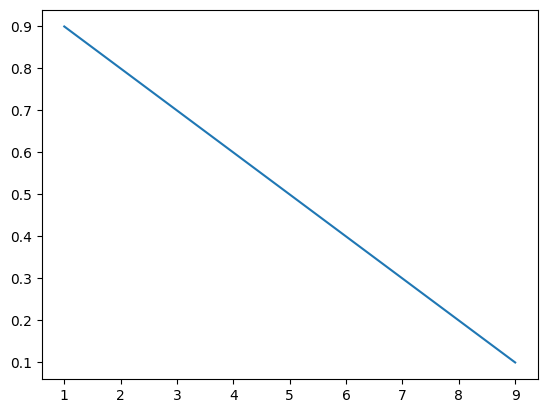

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#Length
L=10.0
#Number of grid cells
N=11
#Left boundary condition
bl=1.0
#Right boundary condition
br=0.0

#Length vector
lv= np.linspace(0.0,L,N)

#Bondary conditions vector
bc=np.zeros(N-2)
bc[0]=-bl
bc[-1]=-br

#Matrix
A=np.zeros((N-2,N-2))
for ii in range(1,N-3):
    A[ii,ii-1]=1
    A[ii,ii]=-2
    A[ii,ii+1]=1
A[0,0]=-2
A[0,1]=1
A[-1,-1]=-2
A[-1,-2]=1

print(A)

#Solve system using numpy
x=np.dot(np.linalg.inv(A),bc)

#Plot solution values
fig = plt.figure()
plt.plot(lv[1:-1],x)
plt.show()

### Relaxation method

From our finite difference approximation, we have the following equation

$$f_{i+1} - 2f_i + f_{i-1} = 0$$

which can be rearranged as follows:


$$f_i = \frac{f_{i+1} + f_{i-1}}{2}$$

We now want to obtain a solution by iteratively trying to converge towards the right solution by using the equation above. Let $f_i^m$ be the solution at iteration $m$, then we calculate the value in the next iteration as

$$f_i^{m+1} = \frac{f_{i+1}^m + f_{i-1}^m}{2}$$

Such a relaxation method is called <i>Jacobi relaxation</i>.

This can be done in Python as follows:


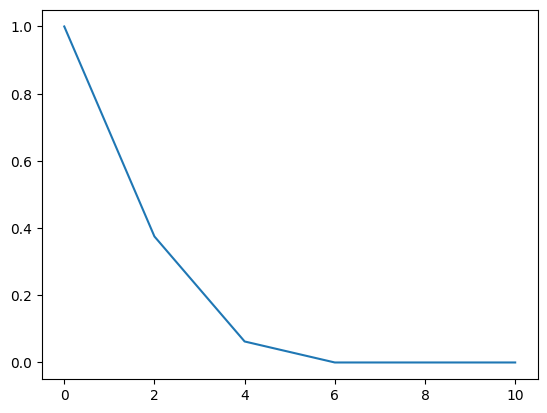

In [15]:
#Solution vectors
fv=np.zeros(N)
#Set boundary conditions
fv[0]=bl
fv[-1]=br
fvnew=np.copy(fv)

#Number of iterations
itn=5

for it in range(0,itn):
#    fvnew[1:N-1]=0.5*(fv[:N-2]+fv[2:])
    for ii in range(1,N-1):
        fvnew[ii]=(fv[ii-1]+fv[ii+1])/2
    fv=np.copy(fvnew)
        
#Plot solution values
fig = plt.figure()
plt.plot(lv,fv)
plt.show()


The Jacobi relaxation needs two copies of each grid cell in its memory. The next method, called <i>Gauss-Seidel relaxation</i>, continuously use the current values in a single copy of the grid.

It has been shown that one obtain a faster convergence by using the current best value when updating the cell values. Gauss-Seidel converges twice as fast as Jacobi [1]. Thus, we calculate

$$f_i = \frac{f_{i+1} + f_{i-1}}{2}$$

with whatever value we currently have for $f_{i+1}$ and $f_{i-1}$. This can be done in Python as follows:


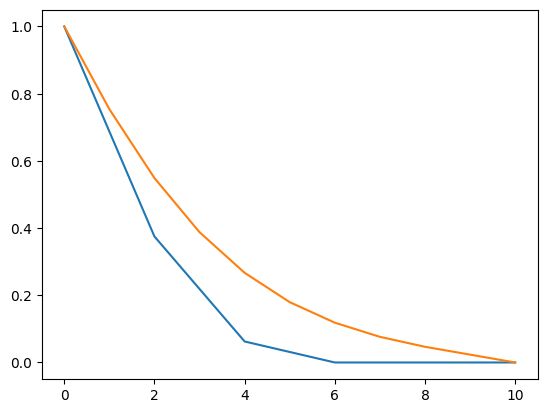

In [16]:
#Solution vector
fvc=np.zeros(N)
#Set boundary conditions
fvc[0]=bl
fvc[-1]=br

for it in range(0,itn):
    for ii in range(1,N-1):
        fvc[ii]=(fvc[ii-1]+fvc[ii+1])/2
        
#Plot solution values
fig = plt.figure()
plt.plot(lv,fv)
plt.plot(lv,fvc)
plt.show()


### Over-relaxation

Instead of using the average of the surrounding grid-cells, another method is to use a weighted sum of the current value and the average of the surrounding values. 

$$f_i^{m+1} = (1-\alpha) f_i^m + \alpha\frac{f_{i+1}^m + f_{i-1}^m}{2}$$

We call $\alpha$ the relaxation factor. Thus, we see that if $\alpha = 1$, then this gives the Jacobi relaxation.

Using the current values, we also have the Gauss-Seidel equivalent 

$$f_i^n = (1-\alpha) f_i^c + \alpha\frac{f_{i+1} + f_{i-1}}{2}$$

Here $f_i^c$ is the current value in cell $i$, while $f_i^n$ is the updated <i>next</i> value. Again, we see that a relaxation factor of $\alpha=1$ yield the Gauss-Seidel method.

If $\alpha < 1$ then we expect a slower convergence than for the traditional $\alpha=1$ methods. However, it turns out that for $\alpha>1$ we obtain a faster convergence. Using $\alpha>1$ is called over-relaxation. Note that the method only converge for $\alpha<2.





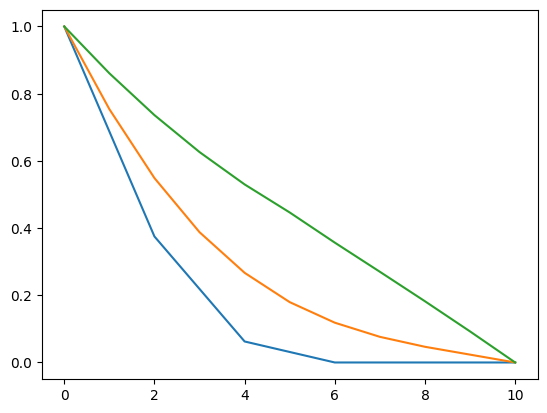

In [17]:
#Solution vector
fovr=np.zeros(N)
#Set boundary conditions
fovr[0]=bl
fovr[-1]=br
#Relaxation parameter
alpha=1.5

for it in range(0,itn):
    for ii in range(1,N-1):
        fovr[ii]=(1-alpha)*fovr[ii]+alpha*(fovr[ii-1]+fovr[ii+1])/2
        
#Plot solution values
fig = plt.figure()
plt.plot(lv,fv)
plt.plot(lv,fvc)
plt.plot(lv,fovr)
plt.show()


## References

[1] PRESS, W. H., FLANNERY, B. P., TEUKOLSKY, S. A., and VETTERLING, W. T. 1989. Numerical Recipes in Pascal: The Art of Scientific Computing. Cambridge University Press, Cambridge, MA.

[2] Hansen, Per Brinch. "Numerical solution of Laplace's equation." (1992).